dataset source: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation/code

# **Import Libraries**

In [1]:
# Step 1: Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, ShuffleSplit


from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score


#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------

import random
import os
import re
import sys
import timeit
import string
import time
import pickle
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib
import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [2]:
# import dataset from google driev

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# concat data train and data test into one dataframe

df_train = pd.read_csv("/content/drive/My Drive/Course/Data Science/Data Project/final_project_ds/Train.csv")
df_test = pd.read_csv("/content/drive/My Drive/Course/Data Science/Data Project/final_project_ds/Test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

# **Evaluate Data Structure**

In [4]:
# check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [5]:
df.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# **Clean the Dataset**

In [7]:
# divide the data column based on their data type
df.columns.groupby(df.dtypes)

{int64: ['ID', 'Age'], float64: ['Work_Experience', 'Family_Size'], object: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']}

In [8]:
#check duplicate value within data

df.duplicated().sum()

38

In [9]:
# drop the duplicate value

df = df.drop_duplicates()

In [10]:
# check data column that have null value in it

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Work_Experience,1090,10.228019
Family_Size,447,4.194426
Ever_Married,189,1.773482
Profession,162,1.520128
Var_1,108,1.013418
Graduated,100,0.938350
ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Spending_Score,0,0.000000


In [11]:
# drop the data row that have at least one null value

df = df.dropna()

## Unique values in each categorical variable:

In [12]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [13]:
df['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

# **Check Target Variable Distribution**

In [14]:
df['Segmentation'].value_counts()

Segmentation
D    2378
A    2304
C    2095
B    2016
Name: count, dtype: int64

Data distributiion for each segment is almost the same, so we don't need to balancing data.

# **Exploratory Data Analysis**

In [15]:
# this function works to diplay the total count of the categorical data in graph

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

In [16]:
# This function is used to display the percentage of one dataset or characteristic within another dataset.

def add_proportion_labels(ax, font_size=10):
    for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy()
      if height > 5:
        ax.text(x+width/2,
                y+height/2,
                '{:.1f}%'.format(height),
                horizontalalignment='center',
                verticalalignment='center',
                fontdict={'size':font_size})

## Distribution Analysis

### Numerical Feature Distribution

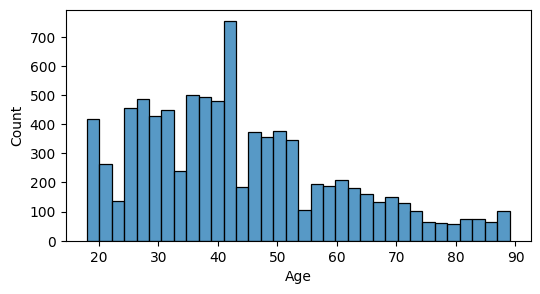

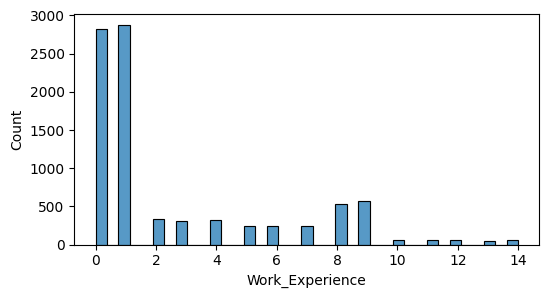

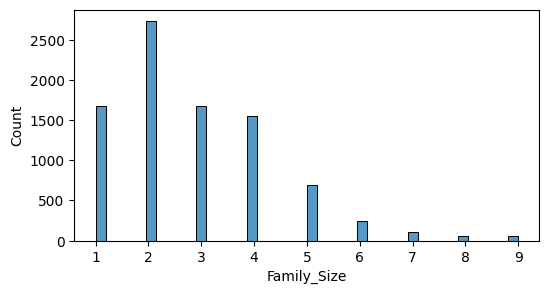

In [17]:
num_col = ('Age', 'Work_Experience', 'Family_Size')
for numerical in num_col:
  plt.figure(figsize=(6,3))
  sns.histplot(data=df, x=numerical)
  # plt.savefig(numerical+'.png')

### Categorical Feature Distribution

In [18]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')

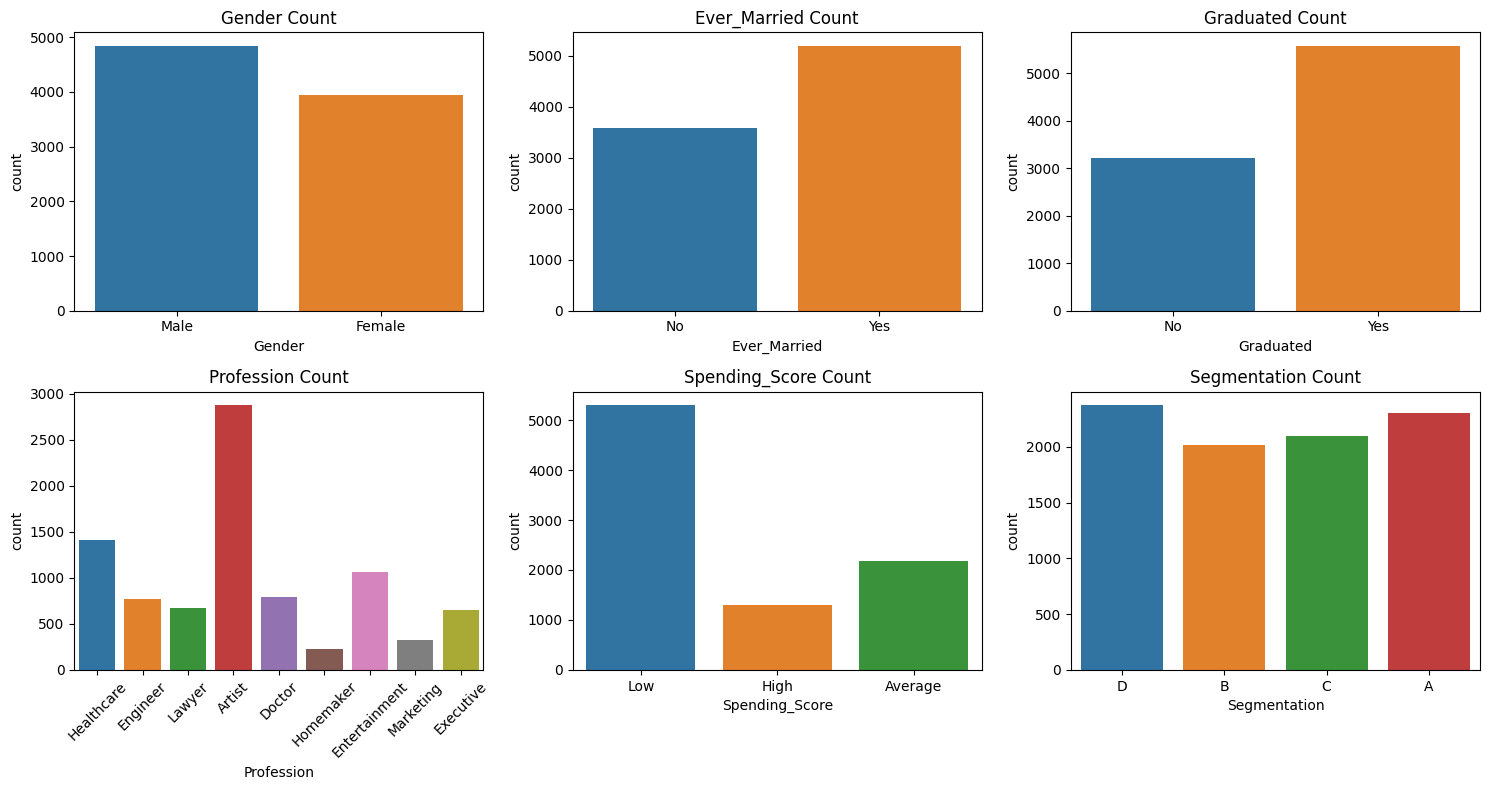

In [19]:
cat_col = df.select_dtypes(include=['object']).drop(columns=['Var_1']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(cat_col, 1):
    plt.subplot(2, 3, i)
    if col == 'Profession':
        sns.countplot(data=df, x=col, hue=col)
        plt.xticks(rotation=45)
    else:
        sns.countplot(data=df, x=col, hue=col)
    plt.title(f'{col} Count')

plt.tight_layout()
plt.show()

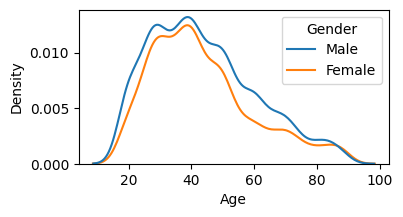

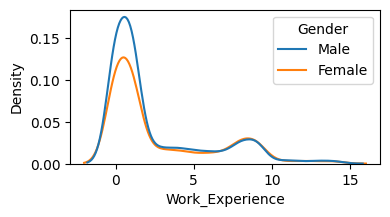

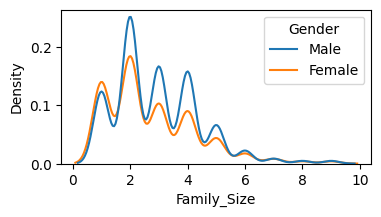

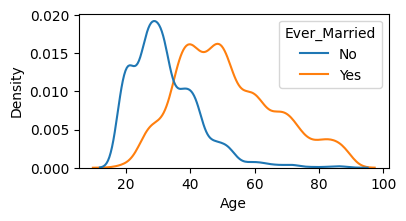

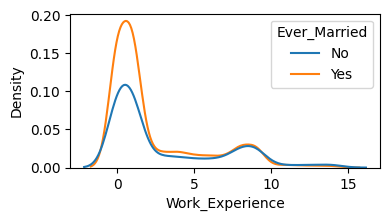

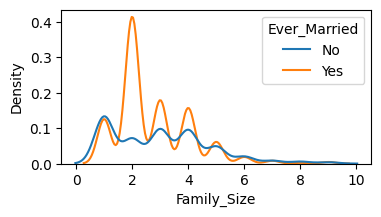

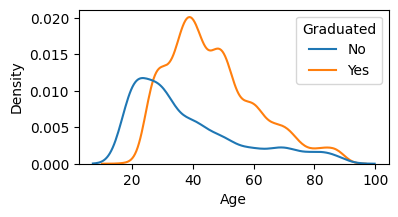

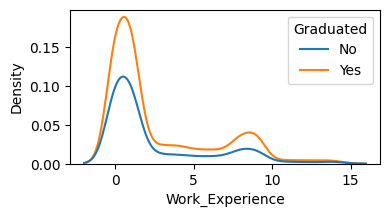

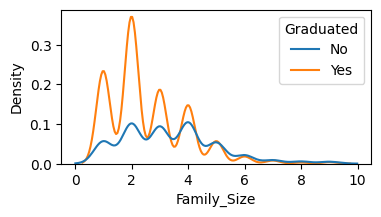

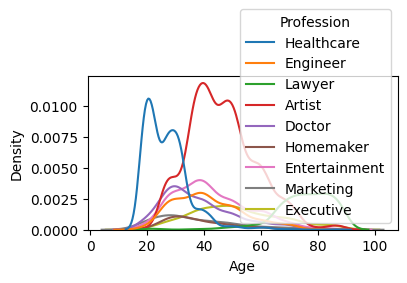

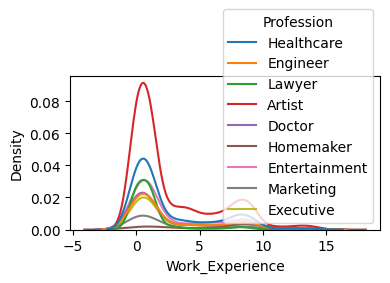

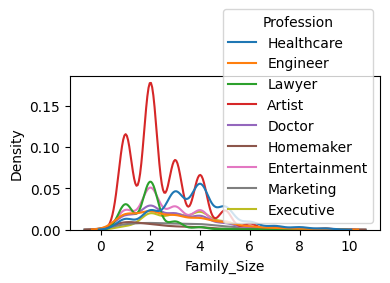

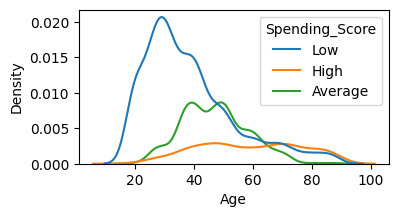

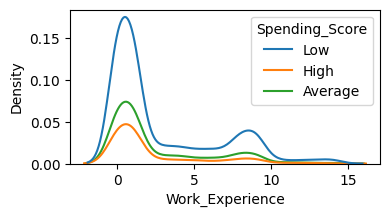

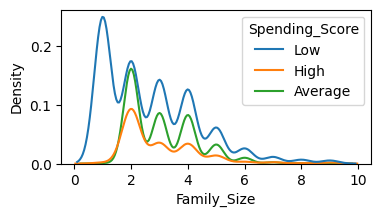

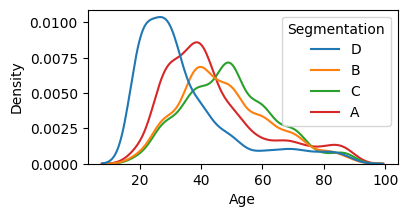

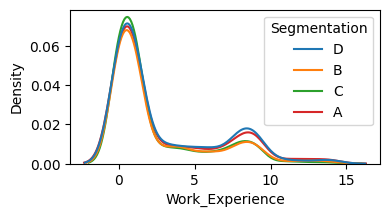

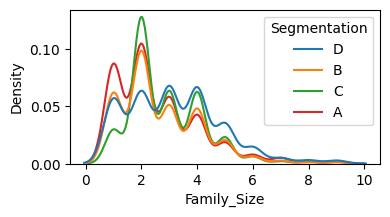

In [20]:
for category in cat_col:
  for numerical in num_col:
    if numerical != 'ID':
      plt.figure(figsize=(4,2))
      sns.kdeplot(data=df, x=numerical, hue=category) # switch to histplot for non-normalized version

## **Profiling Customer Segmentation**

### Segmentation by Profession Type

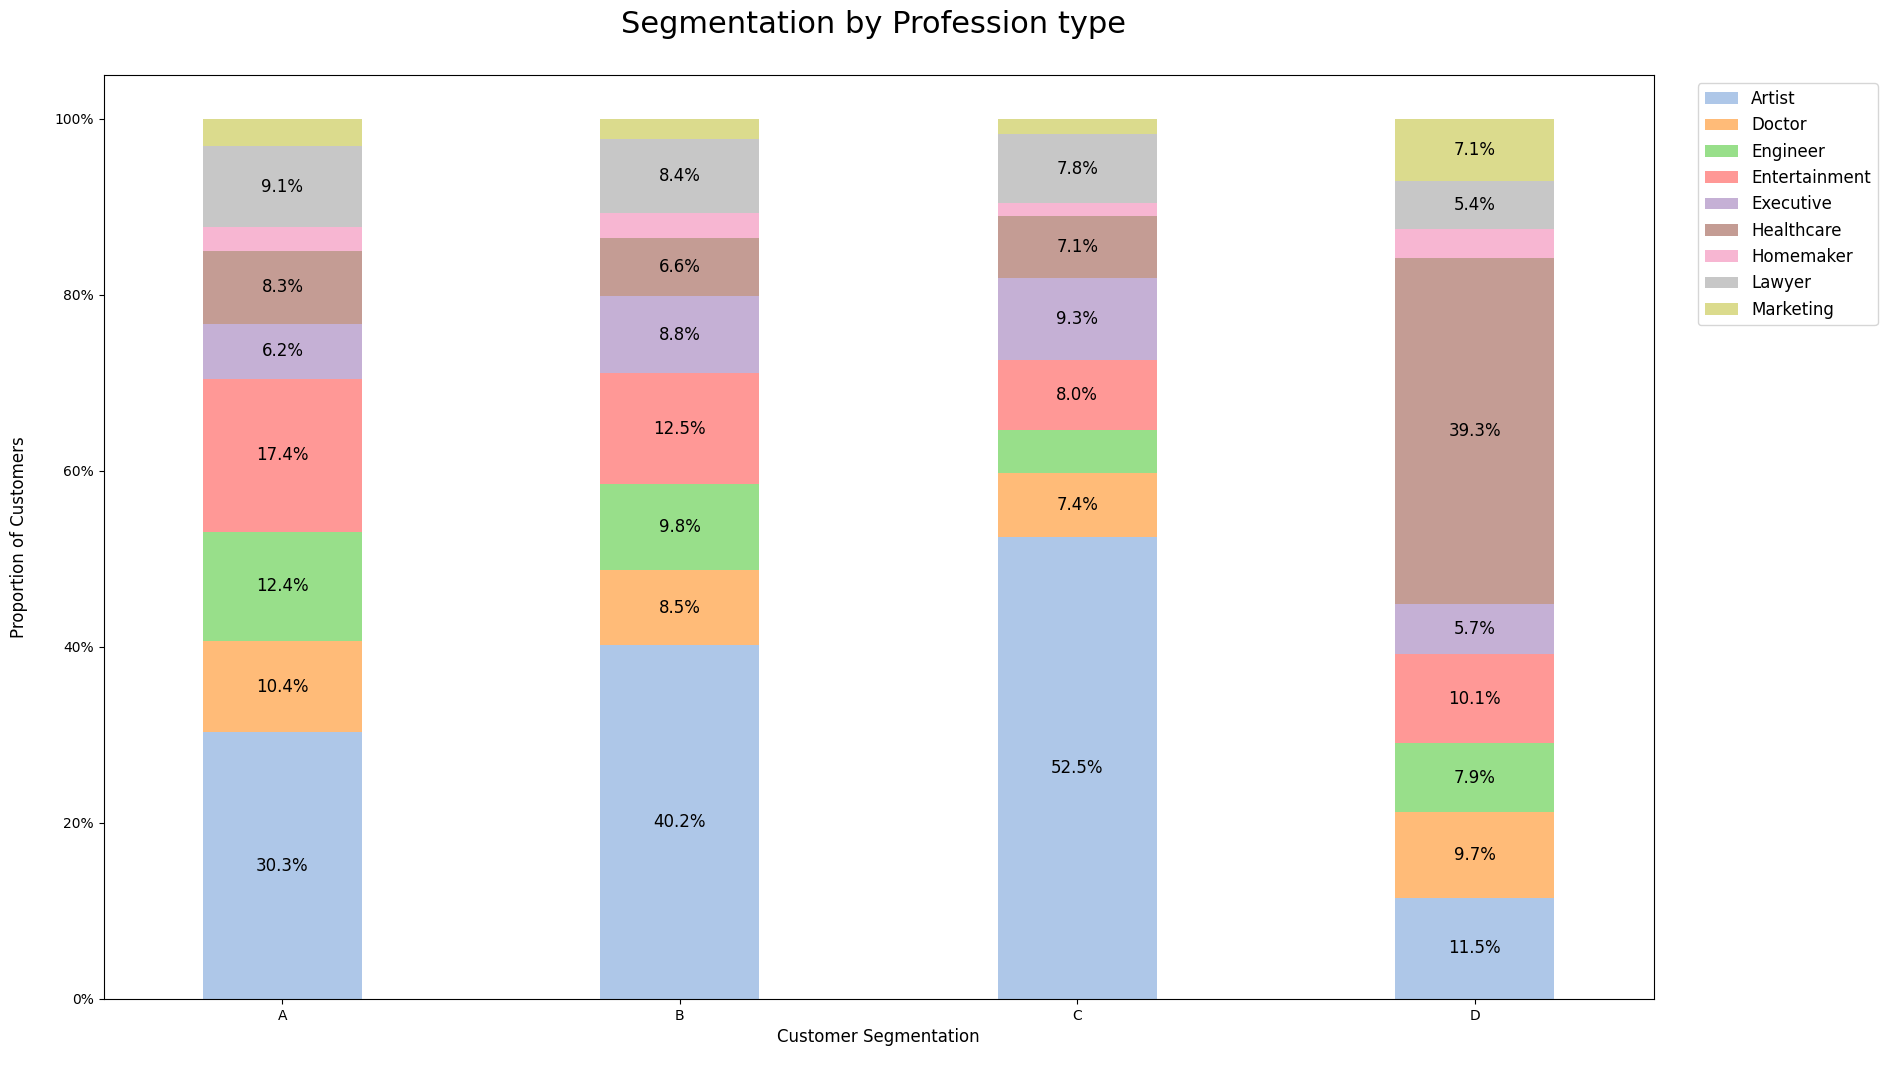

In [21]:
import matplotlib.ticker as mtick

profession_segmentation = df.groupby(['Segmentation', 'Profession']).size().unstack()

colors = [
    '#aec7e8',  # Biru muda
    '#ffbb78',  # Jingga muda
    '#98df8a',  # Hijau muda
    '#ff9896',  # Merah muda
    '#c5b0d5',  # Ungu muda
    '#c49c94',  # Cokelat muda
    '#f7b6d2',  # Magenta muda
    '#c7c7c7',  # Abu-abu muda
    '#dbdb8d'   # Kuning muda
]

ax = (profession_segmentation.T*100.0 / profession_segmentation.T.sum()).T.plot(kind='bar',
                                                                width = 0.4,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (20,12),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Customer Segmentation\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Segmentation by Profession type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "large", bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

add_proportion_labels(ax, 12)

ax.autoscale(enable=False, axis='both', tight=False)

### Segmentation by Spending Score Type

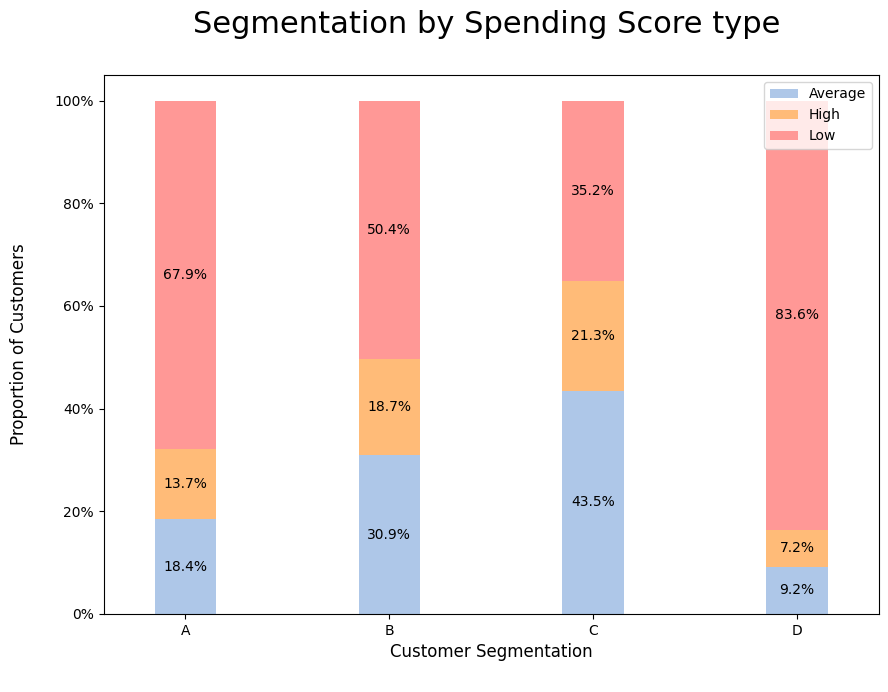

In [22]:
### tambahan dari nurikhsan

spending_score_segmentation = df.groupby(['Segmentation', 'Spending_Score']).size().unstack()

spending_score_segmentation.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors = ['#aec7e8', '#ffbb78', '#ff9896']  # Light blue, Light orange, Light green, Light red

ax = (spending_score_segmentation.T*100.0 / spending_score_segmentation.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (10,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Customer Segmentation\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Segmentation by Spending Score type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

add_proportion_labels(ax)

ax.autoscale(enable=False, axis='both', tight=False)

### Segmentation by Family Size

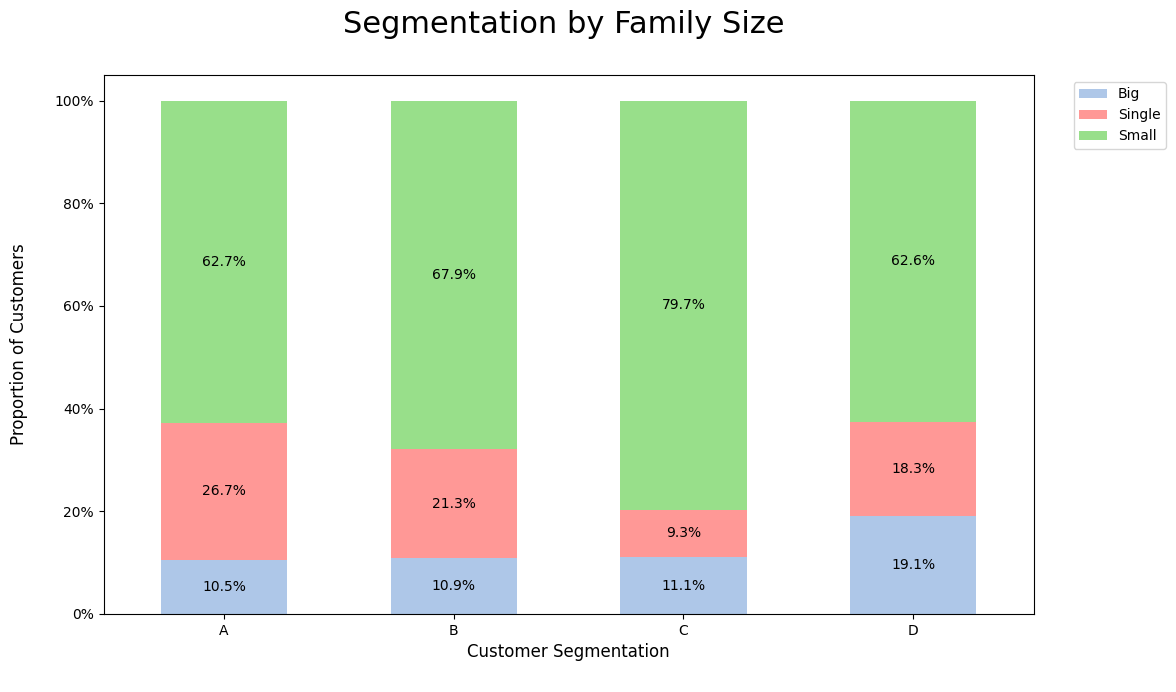

In [23]:
### tambahan dari nurikhsan

family_size = df['Family_Size'].apply(lambda x: 'Single' if x <= 1 else 'Small' if x < 5 else 'Big')
family_size_segmentation = df.groupby([df['Segmentation'], family_size]).size().unstack()

# family_size_segmentation.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors = [
    '#aec7e8',  # Biru muda
    '#ff9896',  # Merah muda
    '#98df8a',  # Hijau muda
    '#ffbb78',  # Jingga muda
    '#ff9896',  # Merah muda (berbeda dari sebelumnya)
    '#c49c94',  # Cokelat muda
    '#f7b6d2',  # Magenta muda
    '#c7c7c7',  # Abu-abu muda
    '#dbdb8d'   # Kuning muda
]

ax = (family_size_segmentation.T*100.0 / family_size_segmentation.T.sum()).T.plot(kind='bar',
                                                                width = 0.55 ,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (12,7),
                                                                color = colors)





plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Customer Segmentation\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Segmentation by Family Size \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium", bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

add_proportion_labels(ax)

ax.autoscale(enable=False, axis='both', tight=False)

### Segmentation by Gender/Ever_Married/Graduated

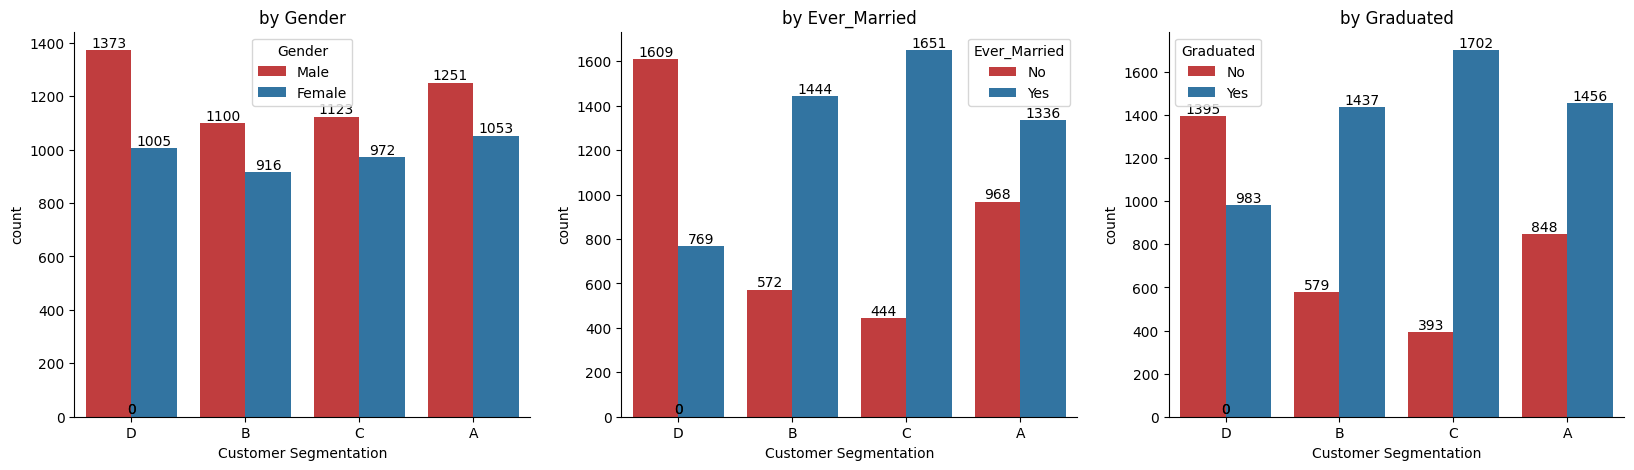

In [24]:
# Membuat subplots
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

# Palet warna
colors = ['#d62728', '#1f77b4']

# Plotting setiap countplot
sns.countplot(data=df, x='Segmentation', hue='Gender', palette=colors, ax=ax[0])
sns.countplot(data=df, x='Segmentation', hue='Ever_Married', palette=colors, ax=ax[1])
sns.countplot(data=df, x='Segmentation', hue='Graduated', palette=colors, ax=ax[2])

hue_columns = ['Gender', 'Ever_Married', 'Graduated']

# Menambahkan nilai teks di atas setiap bar
i = 0
for axes in ax:
    for p in axes.patches:
        axes.annotate(f'{"{:.0f}".format(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                      textcoords='offset points')
    axes.set_xlabel('Customer Segmentation')
    axes.set_xticklabels(df['Segmentation'].unique())  # Mengatur urutan indeks pada sumbu x
    axes.set_title(f'by {hue_columns[i]}')  # Menambahkan judul
    i += 1

# Menghilangkan spines yang tidak perlu
for axis in ax:
    axis.spines[['top', 'right']].set_visible(False)

plt.show()



### Segmentation by Age

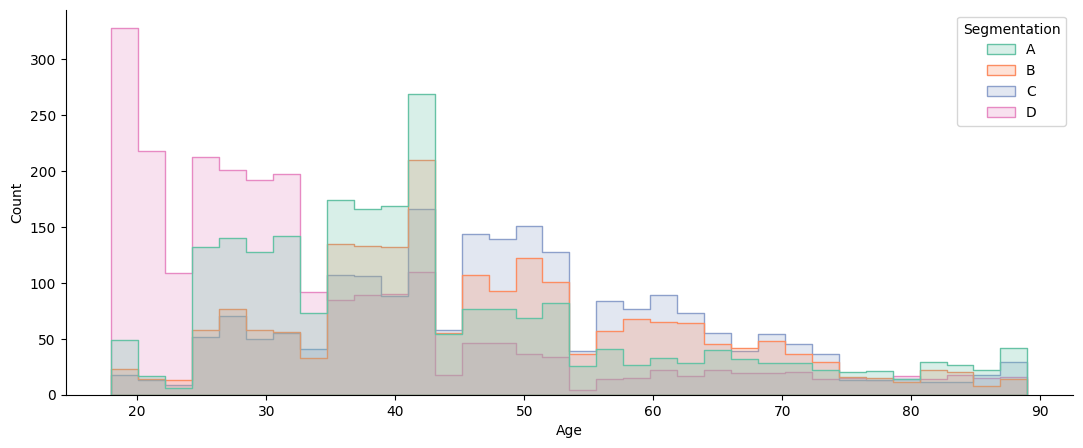

In [25]:
fig, ax = plt.subplots(figsize=(13, 5))

segmentasi = np.sort(df['Segmentation'].unique())
sns.histplot(df, x="Age", hue="Segmentation", hue_order=segmentasi, element="step", palette='Set2')

ax.spines[['top', 'right']].set_visible(False)

plt.show()

### Profiling result

Segment A:
1. The majority of individuals in Segment A work in artistic professions
2. Individuals in Segment A tend to have a low spending score
3. Most individuals in Segment A are married or in committed relationships
4. The majority of individuals in Segment A have completed their education and hold at least a bachelor's degree or higher
5. The age range of individuals in Segment A typically falls between 35 to 42 years old.

Segment B:
1. The majority of individuals in Segment B work in artistic professions
2. Almost 49.6% population in Segment B have average and high spending score
3. Most individuals in Segment B are married or in committed relationships
4. The majority of individuals in Segment B have completed their education and hold at least a bachelor's degree or higher
5. The age range of individuals in Segment B typically falls between 45 to 55 years old.

Segment C:
1. The majority of individuals in Segment C work in artistic professions
2. Almost 64.8% population in Segment C have average and high spending score
3. Most individuals in Segment C are married or in committed relationships
4. The majority of individuals in Segment C have completed their education and hold at least a bachelor's degree or higher
5. The age range of individuals in Segment C typically falls between 45 to 55 years old.

Segment D:
1. The majority of individuals in Segment D work in healtcare professions
2.  Individuals in Segment D tend to have a low spending score
3. Most individuals in Segment D are not married
4. The majority of individuals in Segment D have not completed their education
5. The age range of individuals in Segment D typically falls between 20 to 30 years old.

# **Data Preprocessing**

In [26]:
df_cp = df.copy()

In [27]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8793 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8793 non-null   int64  
 1   Gender           8793 non-null   object 
 2   Ever_Married     8793 non-null   object 
 3   Age              8793 non-null   int64  
 4   Graduated        8793 non-null   object 
 5   Profession       8793 non-null   object 
 6   Work_Experience  8793 non-null   float64
 7   Spending_Score   8793 non-null   object 
 8   Family_Size      8793 non-null   float64
 9   Var_1            8793 non-null   object 
 10  Segmentation     8793 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 824.3+ KB


## Feature Tranformation

*   H0: distribusi normal
*   H1: distribusi tidak normal

In [28]:
# check the p-value for numerical column to see whether the data is normally distributed or no
num_col = df.drop(columns='ID').select_dtypes(include=['int', 'float']).columns

from scipy import stats

for col in num_col:
  normaltest_result = stats.normaltest(df_cp[col])[1]
  if normaltest_result < 0.05:
    print(f'The p-value for the null hypothesis of the {col} not Normally distributed is {normaltest_result}')
  else:
    print(f'The p-value for the null hypothesis of the {col} being Normally distributed is {normaltest_result}')


The p-value for the null hypothesis of the Age not Normally distributed is 2.1942429066309096e-128
The p-value for the null hypothesis of the Work_Experience not Normally distributed is 0.0
The p-value for the null hypothesis of the Family_Size not Normally distributed is 1.1833518612461775e-290


For all numerical column that have being check, their numerical value is below 0.05, so H0 is rejected and all the columns not normally distributed

In [29]:
from sklearn.preprocessing import PowerTransformer

# close the range between the data using log function
def apply_log(column):
    return np.log(column+1)

def normality_test(column):
    return stats.normaltest(column)

In [30]:
def trans_result(data, column):
  # PowerTransform data
  feature = data[column].to_numpy().reshape(-1,1)

  powtr = PowerTransformer()
  feature_transf = powtr.fit_transform(feature)
  array_1d = feature_transf.flatten()
  feature = pd.Series(data=array_1d, index=list(range(len(array_1d))))

  # Log Transform data
  log_transformed = apply_log(data[column])

  # Create axis for original data plot (ax1) and transformed data (ax2)
  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))

  # Plot original data & get metrics
  data[column].plot(kind='hist', ax=ax1)
  ax1.title.set_text('Original data')
  norm_test1 = normality_test(data[column])

  # Plot log transformed data & get metrics
  log_transformed.plot(kind='hist', ax=ax2);
  ax2.title.set_text('Log Transformed data')
  norm_test2 = normality_test(log_transformed)

  # Plot power transformed data & get metrics
  feature.plot(kind='hist', ax=ax3);
  ax3.title.set_text('PowerTransformed data')
  norm_test3 = normality_test(feature)

  # Create a DataFrame that shows normality test results for each tranformation
  norm_results = [norm_test1, norm_test2, norm_test3]
  metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])
  return log_transformed, metrics

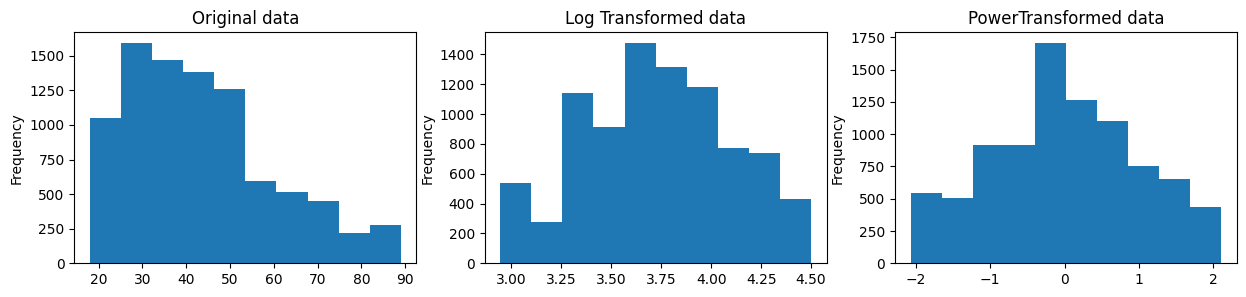

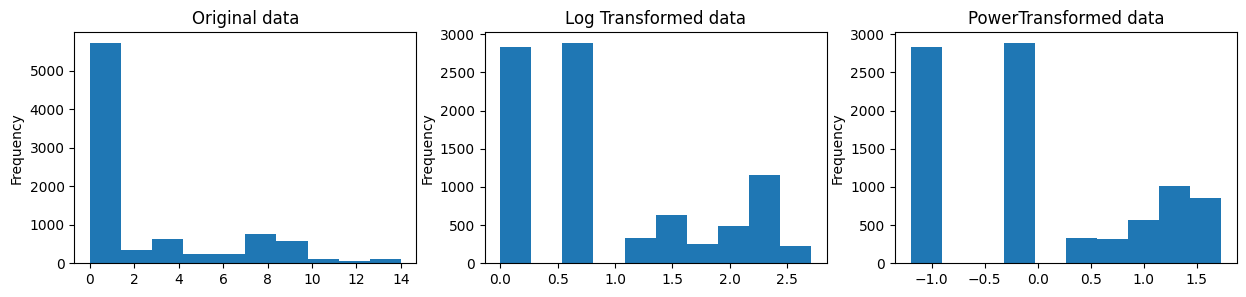

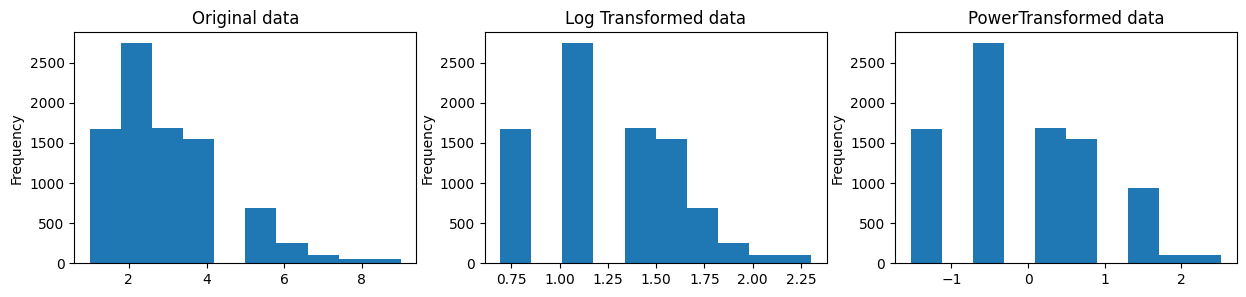

In [31]:
# we use log transform to transform the data
for col in num_col:
  df_cp[col], _ = trans_result(df_cp, col)
# df_cp['Age'], _ = trans_result(df_cp, 'Age')

## Label Encode Binary data

In [32]:
# representing categorical data into numerical data for column that have hierarchy in it

columns = ('Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'Var_1', 'Segmentation')
le_count = 1

encoders = {}
for col in columns:
  result = {}
  lbl = LabelEncoder()
  lbl.fit(df_cp[col])
  df_cp[col] = lbl.transform(df_cp[col])
  encoders[col] = lbl
  unique_values_before = df[col].unique()
  unique_values_after = df_cp[col].unique()
  for indeks in range(len(unique_values_before)):
    result[unique_values_before[indeks]] = unique_values_after[indeks]
  print(f"Nilai unik kolom {col} sebelum dan sesudah encoding:")
  print(result)

Nilai unik kolom Gender sebelum dan sesudah encoding:
{'Male': 1, 'Female': 0}
Nilai unik kolom Ever_Married sebelum dan sesudah encoding:
{'No': 0, 'Yes': 1}
Nilai unik kolom Graduated sebelum dan sesudah encoding:
{'No': 0, 'Yes': 1}
Nilai unik kolom Spending_Score sebelum dan sesudah encoding:
{'Low': 2, 'High': 1, 'Average': 0}
Nilai unik kolom Var_1 sebelum dan sesudah encoding:
{'Cat_4': 3, 'Cat_6': 5, 'Cat_7': 6, 'Cat_3': 2, 'Cat_1': 0, 'Cat_2': 1, 'Cat_5': 4}
Nilai unik kolom Segmentation sebelum dan sesudah encoding:
{'D': 3, 'B': 1, 'C': 2, 'A': 0}


## Encode Categorical Data

In [33]:
# representing categorical data into numerical data for column that doesn't have hierarchy in it

# convert the categorical data into dummies that represent with binary value (0 and 1) and for each data in column have their own column
df_cp = pd.get_dummies(df_cp, drop_first=True) # One-Hot Encoding

In [34]:
df_cp

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,1,0,3.135494,0,0.693147,2,1.609438,3,3,False,False,False,False,True,False,False,False
2,466315,0,1,4.219508,1,0.693147,2,0.693147,5,1,False,True,False,False,False,False,False,False
3,461735,1,1,4.219508,1,0.000000,1,1.098612,5,1,False,False,False,False,False,False,True,False
5,461319,1,1,4.043051,0,0.000000,0,1.098612,5,2,False,False,False,False,False,False,False,False
6,460156,1,0,3.496508,1,0.693147,2,1.386294,5,2,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,467950,0,0,3.583519,1,0.693147,2,1.098612,5,3,False,False,True,False,False,False,False,False
10690,467954,1,0,3.401197,0,2.302585,2,1.609438,5,1,False,False,False,False,True,False,False,False
10691,467958,0,0,3.583519,1,0.693147,2,0.693147,5,0,True,False,False,False,False,False,False,False
10693,467961,1,1,3.871201,1,0.693147,1,1.791759,3,2,False,False,False,True,False,False,False,False


In [35]:
one_hot_columns = df_cp.columns # save all the column that being created after one hot encoding
one_hot_columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'],
      dtype='object')

# **Feature Scaling**

In [36]:
df_tmp = df_cp.copy()

In [37]:
# split data into feature and label

y = df_tmp['Segmentation'].values
X = df_tmp.drop(['Segmentation', 'ID', 'Var_1'], axis=1)

In [38]:
X.head(1)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0,3.135494,0,0.693147,2,1.609438,False,False,False,False,True,False,False,False


In [39]:
X.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'],
      dtype='object')

In [40]:
# scaling the data

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
sc_X = StandardScaler()

# save the scale fitting data for later use when creating a website using pickel.dump function
pickle.dump(sc_X.fit(X), open(f'scaler.pkl', 'wb'))

X = sc_X.fit_transform(X)



# Split Data Train and Data Test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train, X_test, y_train, y_test

(array([[-1.10830162,  0.83124096,  1.39857931, ..., -0.16315626,
         -0.28766027, -0.19559441],
        [-1.10830162, -1.2030206 ,  0.60041257, ..., -0.16315626,
         -0.28766027, -0.19559441],
        [ 0.90228145, -1.2030206 , -1.26079582, ..., -0.16315626,
         -0.28766027, -0.19559441],
        ...,
        [ 0.90228145,  0.83124096,  0.89362971, ..., -0.16315626,
         -0.28766027, -0.19559441],
        [-1.10830162, -1.2030206 , -1.15945715, ...,  6.12909369,
         -0.28766027, -0.19559441],
        [-1.10830162,  0.83124096, -0.03777292, ..., -0.16315626,
         -0.28766027, -0.19559441]]),
 array([[ 0.90228145,  0.83124096,  0.3854854 , ..., -0.16315626,
         -0.28766027, -0.19559441],
        [ 0.90228145, -1.2030206 , -2.10301533, ..., -0.16315626,
         -0.28766027, -0.19559441],
        [-1.10830162,  0.83124096, -0.78850192, ..., -0.16315626,
         -0.28766027, -0.19559441],
        ...,
        [ 0.90228145, -1.2030206 , -1.83427562, ..., -

# **Machine Learning Model**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score

## Model Evaluation

In [44]:
# declare all the machine learning algorithm that we want to use

dt = DecisionTreeClassifier()
svm = SVC(kernel = 'rbf', random_state = 3)
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
xgc = XGBClassifier()
models_1 = [lr,dt,rf,svm, knn, nb, xgc]

In [45]:
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)

    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = 'accuracy')
    score = r2_val_score.mean()
    return score

In [46]:
col = ['Algorithm',  'Accuracy']
model_results = pd.DataFrame(columns=col)

models_name = ['Logistic Regression', 'Desicion Tree', 'Random Forest', 'Support Vector Machine',
               'K-Nearest Neighboor', 'GaussianNB', 'XGBoost CLassifier']

i = 0
for model in models_1:
  models_pred = test_model(model)
  model_results.loc[i] = [models_name[i], round(models_pred * 100, 2)]
  i += 1

model_results

,Algorithm,Accuracy
0,Logistic Regression,46.66
1,Desicion Tree,37.15
2,Random Forest,40.06
3,Support Vector Machine,47.55
4,K-Nearest Neighboor,41.16
5,GaussianNB,44.70
6,XGBoost CLassifier,44.67


In [47]:
def evaluate_model(predictions,name):
    print('Model: ',name)
    print(classification_report(y_test,predictions))
    cm = confusion_matrix(y_test,predictions)
    disp   = ConfusionMatrixDisplay(cm)
    disp.plot()
    na = 'Conf'
    plt.title('Confusion Matrix for '+ name)

In [48]:
preds = [[], [], [], [], [], [], []]

for i,model in enumerate(models_1):
    model.fit(X_train,y_train)
    preds[i] = model.predict(X_test)
preds

[array([0, 3, 0, ..., 3, 3, 2]),
 array([0, 3, 3, ..., 3, 3, 2]),
 array([0, 3, 3, ..., 3, 3, 2]),
 array([1, 3, 0, ..., 3, 3, 2]),
 array([0, 3, 0, ..., 3, 3, 2]),
 array([2, 3, 0, ..., 3, 2, 2]),
 array([0, 3, 0, ..., 3, 3, 2])]

## Model Training and Prediction

Model:  LogisticRegression
              precision    recall  f1-score   support

           0       0.43      0.49      0.46       483
           1       0.32      0.13      0.19       398
           2       0.44      0.59      0.50       400
           3       0.59      0.61      0.60       478

    accuracy                           0.47      1759
   macro avg       0.44      0.46      0.44      1759
weighted avg       0.45      0.47      0.45      1759

Model:  DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.37      0.36      0.37       483
           1       0.29      0.30      0.29       398
           2       0.41      0.45      0.43       400
           3       0.51      0.49      0.50       478

    accuracy                           0.40      1759
   macro avg       0.40      0.40      0.40      1759
weighted avg       0.40      0.40      0.40      1759

Model:  RandomForestClassifier
              precision    recall  f1-sco

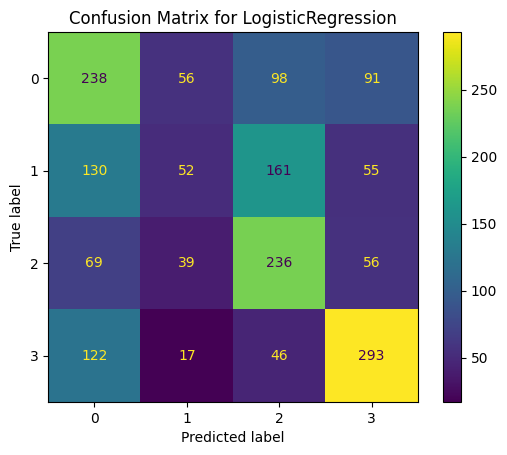

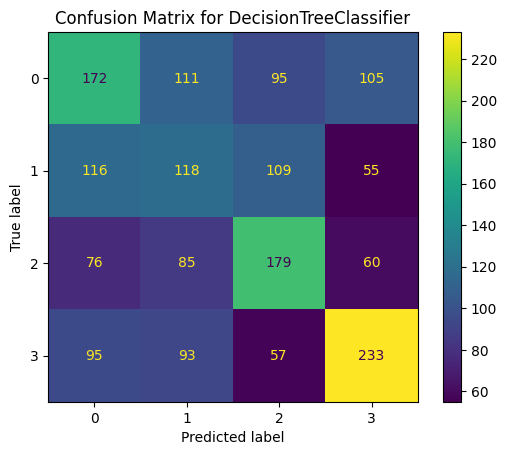

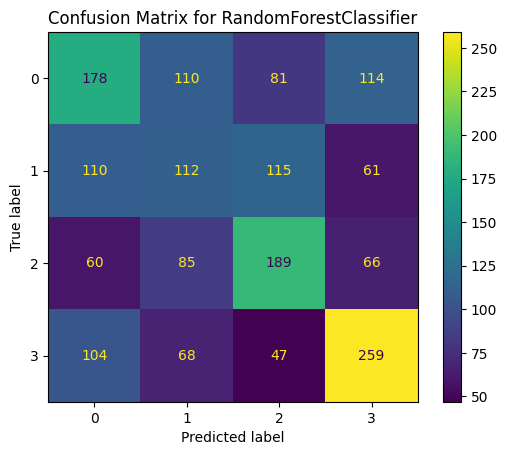

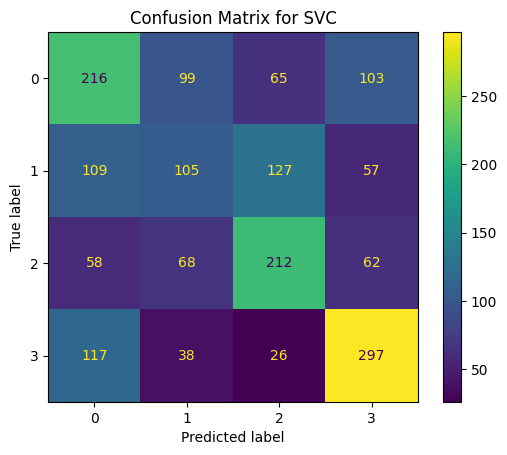

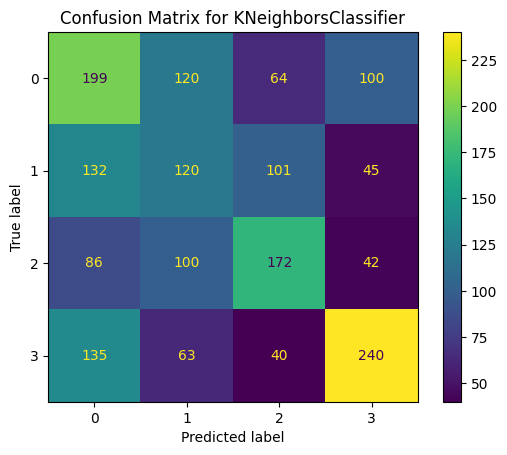

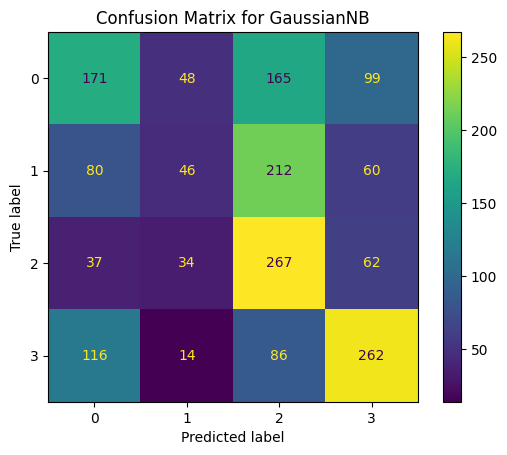

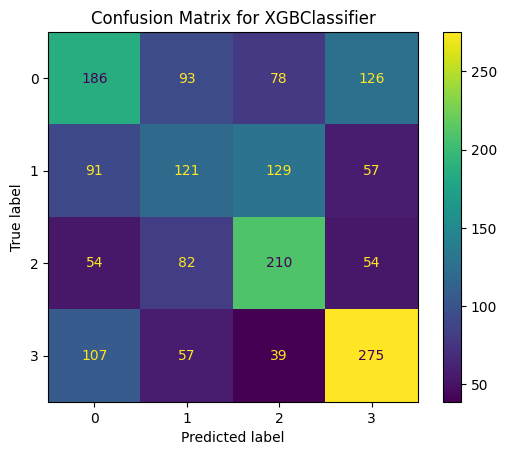

In [49]:
for i in range(len(preds)):
  evaluate_model(predictions = preds[i], name = str(models_1[i]).split('(')[0])

In [50]:
svm = SVC(probability=True)
best_model = svm.fit(X_train, y_train)
pickle.dump(best_model, open(f'model_svm.pkl', 'wb'))

In [51]:
xgb = XGBClassifier(probability=True)
best_model = xgb.fit(X_train, y_train)
pickle.dump(best_model, open(f'model_xgb.pkl', 'wb'))

Model:  XGBClassifier
              precision    recall  f1-score   support

           0       0.42      0.39      0.40       483
           1       0.34      0.30      0.32       398
           2       0.46      0.53      0.49       400
           3       0.54      0.58      0.56       478

    accuracy                           0.45      1759
   macro avg       0.44      0.45      0.44      1759
weighted avg       0.44      0.45      0.45      1759



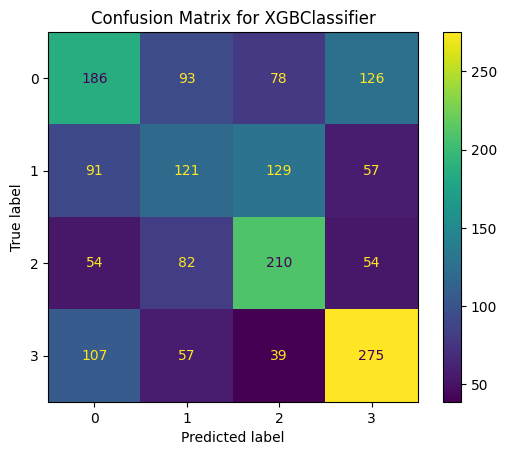

In [52]:
evaluate_model(predictions = preds[6], name = str(models_1[6]).split('(')[0])